In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

In [35]:
df = pd.read_csv('./stock_data/input/TSLA.csv')
df.tail()
print(list(df.columns))

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name']


In [36]:
train_size = int(len(df) * 0.8)
df_train, df_test = df[:train_size], df[train_size:len(df)]
train_data = df_train.iloc[:, 1:2].values

In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)

In [38]:
x_train = []
y_train = []
# Set Time Windows we want to Choose for our predictions
time_window = 60

for i in range(time_window, len(train_data_scaled)):
    x_train.append(train_data_scaled[i - time_window:i, 0])
    y_train.append(train_data_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=50, batch_size=30, use_multiprocessing=True, workers=2)

Epoch 1/50
38/38 [==============================] - 5s 26ms/step - loss: 0.0225
Epoch 2/50
38/38 [==============================] - 1s 27ms/step - loss: 0.0032
Epoch 3/50
38/38 [==============================] - 1s 25ms/step - loss: 0.0029
Epoch 4/50
38/38 [==============================] - 1s 25ms/step - loss: 0.0025
Epoch 5/50
38/38 [==============================] - 1s 27ms/step - loss: 0.0025
Epoch 6/50
38/38 [==============================] - 1s 29ms/step - loss: 0.0025
Epoch 7/50
38/38 [==============================] - 1s 27ms/step - loss: 0.0022
Epoch 8/50
38/38 [==============================] - 1s 30ms/step - loss: 0.0030
Epoch 9/50
38/38 [==============================] - 1s 30ms/step - loss: 0.0021
Epoch 10/50
38/38 [==============================] - 1s 30ms/step - loss: 0.0023
Epoch 11/50
38/38 [==============================] - 1s 27ms/step - loss: 0.0022
Epoch 12/50
38/38 [==============================] - 1s 30ms/step - loss: 0.0026
Epoch 13/50
38/38 [==================

In [40]:
actual_stock_price = df_test.iloc[:, 1:2].values

total_data = pd.concat((df_train['Open'], df_test['Open']), axis=0)
test_data = total_data[len(total_data) - len(df_test) - time_window:].values
test_data = test_data.reshape(-1, 1)
test_data = scaler.transform(test_data)

In [41]:
total_dates = pd.concat((df_train['Date'], df_test['Date']), axis=0)
test_dates = total_dates[len(total_dates) - len(df_test) - time_window:].values
test_dates = test_dates.reshape(-1, 1)

In [42]:
x_test = []
for i in range(time_window, len(test_data)):
    x_test.append(test_data[i - time_window:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [43]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

10/10 [==============================] - 1s 10ms/step


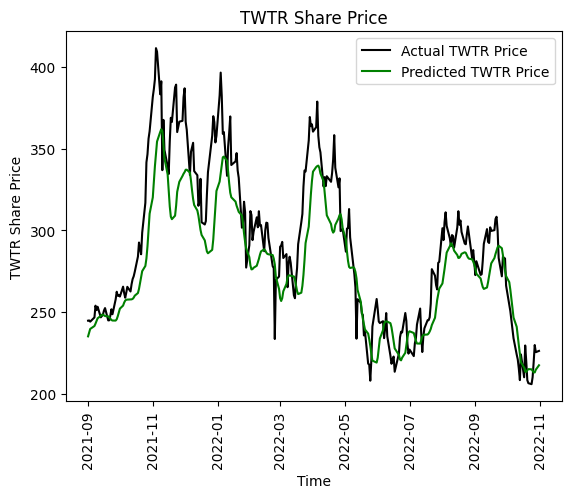

In [44]:
plt_test_dates = [dt.datetime.strptime(d, '%Y-%m-%d') for d in test_dates[time_window:, 0]]
plt.plot(plt_test_dates, actual_stock_price[:, 0], color='black', label='Actual TWTR Price')
plt.plot(plt_test_dates, predicted_stock_price[:, 0], color='green', label='Predicted TWTR Price')
plt.xticks(rotation=90)
plt.title('TWTR Share Price')
plt.xlabel('Time')
plt.ylabel('TWTR Share Price')
plt.legend()
plt.show()

In [45]:
future_predictions =[]
for i in range(0, 30):
    real_data = [test_data[len(test_data) + i - time_window:len(test_data + i), 0]]
    real_data = np.array(real_data)
    real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
    prediction = model.predict(real_data)
    prediction = scaler.inverse_transform(prediction)
    future_predictions.append(prediction)
for i in range(0,len(future_predictions)):
    print(f'Prediction {i}: {future_predictions[i]}')

1/1 [==============================] - 0s 29ms/step
Prediction 0: [[220.48715]]
Prediction 1: [[220.4874]]
Prediction 2: [[220.48763]]
Prediction 3: [[220.48782]]
Prediction 4: [[220.48796]]
Prediction 5: [[220.48804]]
Prediction 6: [[220.488]]
Prediction 7: [[220.4879]]
Prediction 8: [[220.4877]]
Prediction 9: [[220.4874]]
Prediction 10: [[220.48683]]
Prediction 11: [[220.4861]]
Prediction 12: [[220.48495]]
Prediction 13: [[220.4832]]
Prediction 14: [[220.48071]]
Prediction 15: [[220.47722]]
Prediction 16: [[220.47269]]
Prediction 17: [[220.46631]]
Prediction 18: [[220.45807]]
Prediction 19: [[220.44778]]
Prediction 20: [[220.4342]]
Prediction 21: [[220.4183]]
Prediction 22: [[220.39943]]
Prediction 23: [[220.37694]]
Prediction 24: [[220.35071]]
Prediction 25: [[220.32115]]
Prediction 26: [[220.291]]
Prediction 27: [[220.25899]]
Prediction 28: [[220.22209]]
Prediction 29: [[220.17885]]
